# 📊 Análisis de Datos de Libros

**Fernando Blanco**

Este notebook realiza un análisis exploratorio sobre los datos extraídos y procesados desde https://books.toscrape.com/, utilizando **Pandas**, **NumPy**, **Seaborn** y **Matplotlib**.

---

## Objetivo

Analizar la información de los libros (título, precio, disponibilidad, rating, categoría e imagen) para identificar patrones y generar visualizaciones que aporten valor.

---

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\blanc\OneDrive\Escritorio\Ingenieria de Datos\Proyectos\Web Scraping y ETL\data\processed\books.csv")
df.head()

,title,price,availability,rating,category,image_path
0,A Light in the Attic,51.77,22,3,Poetry,images\A_Light_in_the_Attic.jpg
1,Tipping the Velvet,53.74,20,1,Historical Fiction,images\Tipping_the_Velvet.jpg
2,Soumission,50.10,20,1,Fiction,images\Soumission.jpg
3,Sharp Objects,47.82,20,4,Mystery,images\Sharp_Objects.jpg
4,Sapiens: A Brief History of Humankind,54.23,20,5,History,images\Sapiens__A_Brief_History_of_Humankind.jpg


In [78]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         499 non-null    object 
 1   price         499 non-null    float64
 2   availability  499 non-null    int64  
 3   rating        499 non-null    int64  
 4   category      499 non-null    object 
 5   image_path    499 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 23.5+ KB


,price,availability,rating
count,499.000000,499.000000,499.000000
mean,35.045892,13.669339,2.923848
std,14.567168,3.006833,1.427714
min,10.160000,7.000000,1.000000
25%,21.845000,12.000000,2.000000
50%,36.720000,14.000000,3.000000
75%,47.770000,16.000000,4.000000
max,59.900000,22.000000,5.000000


In [79]:
# Eliminar columna image_path

df = df.drop(columns=['image_path'])

----
**Distribucion de Precios de Libros**

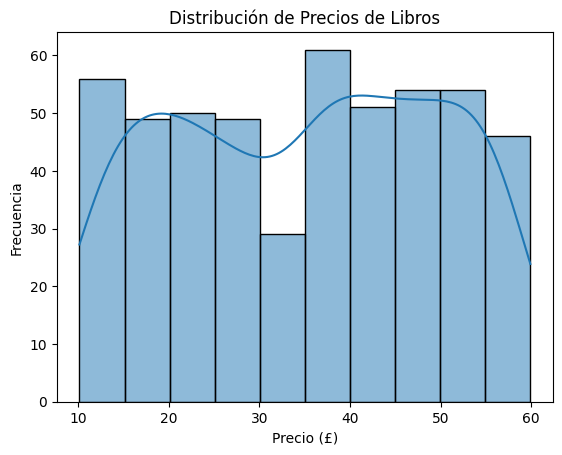

In [80]:
sns.histplot(df['price'], kde=True)
plt.title("Distribución de Precios de Libros")
plt.xlabel("Precio (£)")
plt.ylabel("Frecuencia")
plt.show()

Con esta distribución se puede observar que hay menos unidades que cuesten de entre 30 y 35 libras esterlinas. Lo demás está balanceado exceptuando los libros de precios entre 35 y 40 que son de los que más unidades existen.

**Categorias con mas unidades.**

In [81]:
df['category'].value_counts().head(10)

category
Default           79
Nonfiction        63
Sequential Art    40
Fiction           36
Add a comment     27
Young Adult       27
Food and Drink    19
Mystery           18
Fantasy           18
Romance           15
Name: count, dtype: int64

Las categorias con mas unidades son `Default`, `Nonfiction`, `Sequential Art` y `Fiction`.

Tambien se puede observar que hay categorias que no fueron registradas de manera correcta, como `Add a comment` pero para caso de este estudio se mantendrán.

**Categorias con los precios promedios más altos.**

In [82]:
categorias_precios_altos = df.groupby('category')['price'].mean().sort_values(ascending=False).head(10)
print(categorias_precios_altos)

category
Suspense        58.330000
Novels          54.810000
Politics        53.613333
Health          51.452500
Christian       50.860000
New Adult       48.070000
Science         44.488333
Travel          43.548000
Contemporary    42.280000
Fantasy         40.065000
Name: price, dtype: float64


Las categorias `Suspense` y `Novels` son las más costosas aunque no por mucho.

**Categorías con el Precio Máximo Más Alto**

In [83]:
categorias_precio_max = df.groupby('category')['price'].max().sort_values(ascending=False).head(10)
categorias_precio_max

category
Nonfiction       59.90
History          59.64
Mystery          59.48
Fiction          59.45
Add a comment    59.15
Default          58.87
Suspense         58.33
Young Adult      58.14
Philosophy       58.11
Childrens        58.08
Name: price, dtype: float64

**Libros más caros por categoría**

In [84]:
libros_mas_caros = df.loc[df.groupby('category')['price'].idxmax()]
libros_mas_caros = libros_mas_caros.sort_values(by='price', ascending=False)
libros_mas_caros[['category', 'title', 'price', 'rating']].head(5)

,category,title,price,rating
365,Nonfiction,The Diary of a Young Girl,59.90,3
133,History,Thomas Jefferson and the Tripoli Pirates: The ...,59.64,1
386,Mystery,Boar Island (Anna Pigeon #19),59.48,3
392,Fiction,The Improbability of Love,59.45,1
361,Add a comment,The Gray Rhino: How to Recognize and Act on th...,59.15,4


El libro más caro de todo el catálogo de libros es de la categoria `Nonfiction` llamado `The Diary of a Young Girl`.

Algo notable es que los libros más caros, no son los mejor calificados por los lectores.

**Libros mas baratos**

In [96]:
libros_mas_baratos = libros_mas_caros.sort_values(by='price', ascending=True).head(5)
pd.set_option('display.max_colwidth', None)
libros_mas_baratos

,title,price,availability,rating,category
152,The Long Shadow of Small Ghosts: Murder and Memory in an American City,10.97,15,1,Crime
200,Dark Notes,19.19,15,5,Erotica
396,"Setting the World on Fire: The Brief, Astonishing Life of St. Catherine of Siena",21.15,11,2,Biography
340,All the Light We Cannot See,29.87,14,5,Historical
453,The Grownup,35.88,8,1,Short Stories


El libro más barato es `The Long Shadow of Small Ghosts: Murder and Memory in an American City` y tiene una calificación muy baja.

Aunque el segundo más barato `Dark Notes` tiene buena calificación.

**Libros con más disponibilidad**

In [86]:
libros_mas_disponibilidad = df.sort_values(by='availability', ascending=False).head(5)
libros_mas_disponibilidad

,title,price,availability,rating,category
0,A Light in the Attic,51.77,22,3,Poetry
3,Sharp Objects,47.82,20,4,Mystery
1,Tipping the Velvet,53.74,20,1,Historical Fiction
2,Soumission,50.10,20,1,Fiction
4,Sapiens: A Brief History of Humankind,54.23,20,5,History


**Libros con menos disponibilidad**

In [87]:
libros_menos_disponibilidad = df.sort_values(by='availability', ascending=True).head(5)
libros_menos_disponibilidad

,title,price,availability,rating,category
498,The Whale,35.96,7,4,Childrens
497,The Year of Living Biblically: One Man's Humbl...,34.72,7,1,Default
496,Toddlers Are A**holes: It's Not Your Fault,25.55,7,1,Humor
495,Under the Tuscan Sun,37.33,7,3,Travel
494,Unreasonable Hope: Finding Faith in the God Wh...,46.33,7,2,Spirituality


**Categoria con mas disponibilidad**

In [88]:
categorias_mas_disponibilidad = df.groupby('category')['availability'].sum().sort_values(ascending=False).head(5)
categorias_mas_disponibilidad

category
Default           1068
Nonfiction         816
Sequential Art     598
Fiction            481
Young Adult        363
Name: availability, dtype: int64

Es buena opción para adquirir libros de las categorias `Nonfiction`, `Sequential Art`, `Fiction` y `Young Adult`.

**Categoria con menos disponibilidad**

In [89]:
categorias_menos_disponibilidad = df.groupby('category')['availability'].sum().sort_values(ascending=True).head(5)
categorias_menos_disponibilidad

category
Short Stories     8
Suspense          8
Novels            9
Historical       14
Crime            15
Name: availability, dtype: int64

**Relacion rating - precio**

In [90]:
precio_por_rating = df.groupby('rating')['price'].mean()
print(precio_por_rating)

rating
1    35.999000
2    33.677745
3    34.222424
4    36.272717
5    35.080937
Name: price, dtype: float64


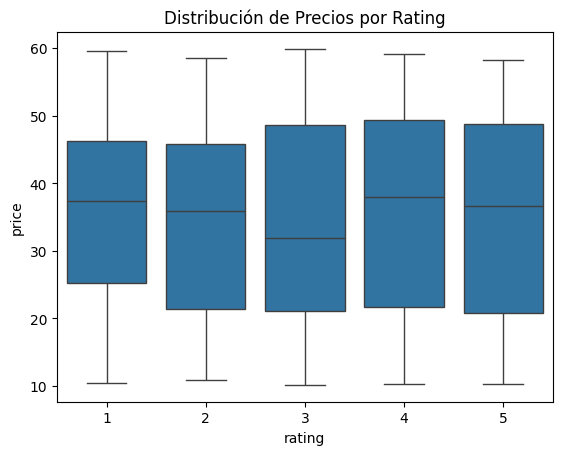

In [91]:
sns.boxplot(x='rating', y='price', data=df)
plt.title("Distribución de Precios por Rating")
plt.show()

Las calificaciones no influyen en el precio del libro, no es algo que tenga relación.

**Libros que valgan menos de 200 y tengan 5 estrellas.**

In [92]:
df = df[(df['price'] < 20) & (df['rating'] == 5)]
df.head(5)

,title,price,availability,rating,category
12,Set Me Free,17.46,19,5,Young Adult
30,The Four Agreements: A Practical Guide to Pers...,17.66,18,5,Spirituality
34,Sophie's World,15.94,18,5,Philosophy
54,Thirst,17.27,16,5,Fiction
80,"Princess Jellyfish 2-in-1 Omnibus, Vol. 01 (Pr...",13.61,16,5,Sequential Art


In [93]:
len(df)

21

21 libros son accesibles con una calificación excelente, por si se busca adquirir una lectura con la relación calidad-precio.